# Creating a classification model to predict the sentiment either (1 or 0) based

## Importing Necessary Libraries

In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Reading Dataset

In [235]:
data = pd.read_csv('amazon_alexa.csv')


## Exploratory Data Analysis

In [236]:
data.head()

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1


In [237]:
data.tail()


,Unnamed: 0,rating,date,variation,verified_reviews,feedback
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,3149,4,29-Jul-18,Black Dot,Good,1


In [238]:
data.shape

(3150, 6)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3150 non-null   int64 
 1   rating            3150 non-null   int64 
 2   date              3150 non-null   object
 3   variation         3150 non-null   object
 4   verified_reviews  3150 non-null   object
 5   feedback          3150 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.8+ KB


In [240]:
data.describe()

,Unnamed: 0,rating,feedback
count,3150.000,3150.000000,3150.000000
mean,1574.500,4.463175,0.918413
std,909.471,1.068506,0.273778
min,0.000,1.000000,0.000000
25%,787.250,4.000000,1.000000
50%,1574.500,5.000000,1.000000
75%,2361.750,5.000000,1.000000
max,3149.000,5.000000,1.000000


In [241]:
data.isnull().sum()

Unnamed: 0          0
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [242]:
data.drop(data.filter(regex='Unnamed'),axis=1,inplace=True)
data.drop(['date'],axis=1,inplace=True)

In [243]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


## Creating a new Column into the dataset

In [262]:
data['length_of_reviews']=data['verified_reviews'].apply(len)
data.head()

,rating,variation,verified_reviews,feedback,length_of_reviews
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5


In [263]:
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

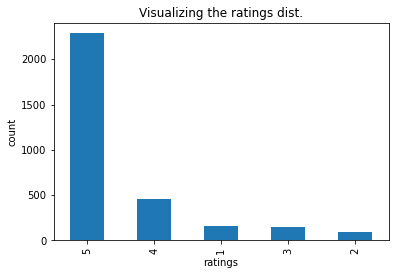

In [264]:
data['rating'].value_counts().plot.bar()
plt.title('Visualizing the ratings dist.')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

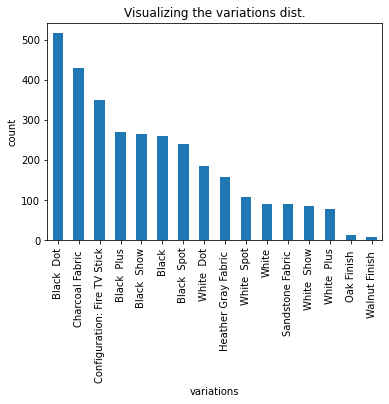

In [265]:
data['variation'].value_counts().plot.bar()
plt.title('Visualizing the variations dist.')
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

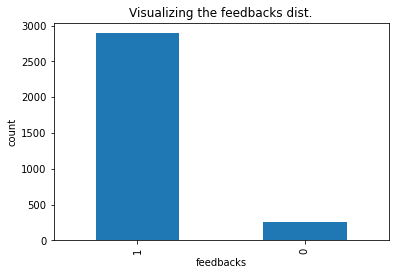

In [266]:
data['feedback'].value_counts().plot.bar()
plt.title('Visualizing the feedbacks dist.')
plt.xlabel('feedbacks')
plt.ylabel('count')
plt.show()

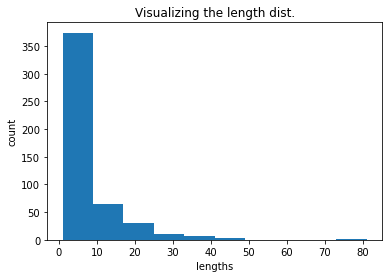

In [267]:
data['length_of_reviews'].value_counts().plot.hist()
plt.title('Visualizing the length dist.')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

In [268]:
data.describe()

,rating,feedback,length_of_reviews
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [269]:
data[data['length_of_reviews'] == 1]['verified_reviews'].iloc[0]

'😍'

In [270]:
data[data['length_of_reviews'] == 134]['verified_reviews'].iloc[0]

"I love Alexa! It's great helping me, making my appointments, playing the songs I like! What else can you do? Looking forward for more."

In [271]:
data[data['length_of_reviews'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

list_of_reviews=data['verified_reviews'].tolist()
len(list_of_reviews)

In [272]:
string_of_reviews=" ".join(review_list)
string_of_reviews

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

## CONVERTING THE WORDS TO LOWERCASE AND REMOVING THE PUNCTUATIONS AND STOPWORDS

In [273]:
import re
import string

In [274]:
string_of_reviews=string_of_reviews.lower()
string_of_reviews=string_of_reviews.translate(str.maketrans('','',string.punctuation))
string_of_reviews

'love my echo loved it sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you  i like being able to turn lights on and off while away from home i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well music i received the echo as a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker can’t wait to see what else it can do without having a cellphone i cannot use many of her features i have an ipad but do not see that of any use  it is a great alarm  if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herit is fun to ask random questions to hear her response  she does not seem to be very smartbon politics yet i think this is the 5th one ive purchased im working on getting one in every room o

In [275]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [276]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [277]:
def message_cleaning(message):
    punctuation_removed = [char for char in message if char not in string.punctuation]
    punctuation_removed_join = ''.join(punctuation_removed)
    punctuation_removed_join_clean = [word for word in punctuation_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punctuation_removed_join_clean


In [278]:
string = string_of_reviews
# Converting String into tokens
list2 = nltk.word_tokenize(string)
print(list2)
lemmatized_string = ' '.join([wnl.lemmatize(words) for words in list2])
print(lemmatized_string)  

['love', 'my', 'echo', 'loved', 'it', 'sometimes', 'while', 'playing', 'a', 'game', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you', 'i', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home', 'i', 'have', 'had', 'a', 'lot', 'of', 'fun', 'with', 'this', 'thing', 'my', '4', 'yr', 'old', 'learns', 'about', 'dinosaurs', 'i', 'control', 'the', 'lights', 'and', 'play', 'games', 'like', 'categories', 'has', 'nice', 'sound', 'when', 'playing', 'music', 'as', 'well', 'music', 'i', 'received', 'the', 'echo', 'as', 'a', 'gift', 'i', 'needed', 'another', 'bluetooth', 'or', 'something', 'to', 'play', 'music', 'easily', 'accessible', 'and', 'found', 'this', 'smart', 'speaker', 'can', '’', 't', 'wait', 'to', 'see', 'what', 'else', 'it', 'can', 'do', 'without', 'having', 'a', 'cellphone', 'i', 'can', 'not', 'use', 'many', 'of', 'her', 'features', 'i', 

NameError: name 'wnl' is not defined

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(40,40))
plt.imshow(WordCloud().generate(string))

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

## Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
 
document = list_of_reviews
 
# Create a Vectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(document)
 
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
 
# Encode the Document
vector = vectorizer.transform(document)
 
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(corpus).toarray()

y = data['feedback'].values
print(x)
print(y)
print(x.shape)
print(y.shape)

## Splitting Train And Test Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 25)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

## Multinomial Naive Bayes 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB_classifier = MultinomialNB()
MNB_classifier.fit(x_train, y_train)

In [ ]:
MNB_ypred = MNB_classifier.predict(x_test)
MNB_ypred

In [ ]:
MNB = accuracy_score(y_test,MNB_ypred)
print(' Multinomial Naïve Bayes Accuracy Score: ',MNB)
cm_MNB=my_confusion_matrix(y_test, MNB_ypred, ' Multinomial Naïve Bayes Confusion Matrix')


## KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

In [ ]:
knn_ypred = knn.predict(x_test)
knn_ypred

In [ ]:
Knn = accuracy_score(y_test,knn_ypred)
print('KNN Classifier Accuracy Score: ',Knn)
cm_knn=my_confusion_matrix(y_test, knn_ypred, 'KNN Confusion Matrix')


## Logistic Regression

In [279]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [280]:
logreg_ypred=logreg.predict(x_test)
logreg_ypred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

LOGISTIC REGRESSION Accuracy Score:  0.9317460317460318
              precision    recall  f1-score   support

           0       0.72      0.31      0.43       106
           1       0.94      0.99      0.96      1154

    accuracy                           0.93      1260
   macro avg       0.83      0.65      0.70      1260
weighted avg       0.92      0.93      0.92      1260



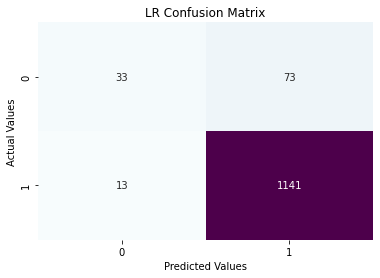

In [281]:
logreg = accuracy_score(y_test,logreg_ypred)
print('LOGISTIC REGRESSION Accuracy Score: ',logreg)
cm_logreg=my_confusion_matrix(y_test, logreg_ypred, 'LR Confusion Matrix')


## Random Forest Classifier

In [282]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [283]:
rfc_ypred=rf.predict(x_test)
rfc_ypred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

RANDOM FOREST CLASSIFIER Accuracy Score:  0.95
              precision    recall  f1-score   support

           0       0.84      0.50      0.63       106
           1       0.96      0.99      0.97      1154

    accuracy                           0.95      1260
   macro avg       0.90      0.75      0.80      1260
weighted avg       0.95      0.95      0.94      1260



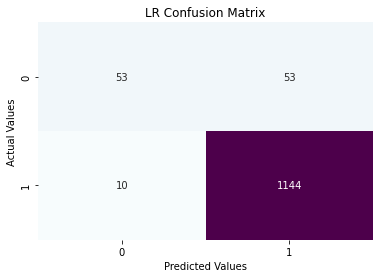

In [284]:
rfc= accuracy_score(y_test,rfc_ypred)
print('RANDOM FOREST CLASSIFIER Accuracy Score: ',rfc)
cm_rfc=my_confusion_matrix(y_test, rfc_ypred, 'LR Confusion Matrix')


## DecisionTree Classifier 

In [285]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [286]:
dtc_ypred=rf.predict(x_test)
dtc_ypred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

DECISION TREE CLASSIFIER Accuracy Score:  0.95
              precision    recall  f1-score   support

           0       0.84      0.50      0.63       106
           1       0.96      0.99      0.97      1154

    accuracy                           0.95      1260
   macro avg       0.90      0.75      0.80      1260
weighted avg       0.95      0.95      0.94      1260



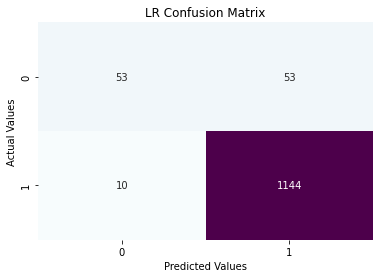

In [287]:
dtc= accuracy_score(y_test,dtc_ypred)
print('DECISION TREE CLASSIFIER Accuracy Score: ',dtc)
cm_dtc=my_confusion_matrix(y_test, dtc_ypred, 'LR Confusion Matrix')


## ACCURACY RESULTS IN THE FORM OF BARPLOT

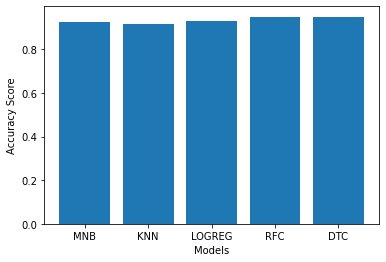

In [288]:
plt.bar(x=['MNB','KNN','LOGREG','RFC','DTC'],height=[MNB,Knn,logreg,rfc,dtc])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.show()

## BY OBSERVING ALL THE ACCURACIES FROM ALL THE MODELS LOGISTIC REGRESSION MODELS GIVES US THE BEST ACCURACY of 0.93 (i.e., 93%)